#Working with MNE and EEG-BIDS Part 1

In this notebook we will go over:


*   Data exploration
*   Cropping and filtering
*   EEG-BIDS



#Import packages

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pathlib
import mne
import mne_bids

Ensure Matplotlib uses the `Qt5Agg` backend, which is the best choice for MNE-Python's interactive plotting functions. 

In [ ]:
matplotlib.use('Qt5Agg')

#Data Exploration

## Load the dataset

In this tutorial, we will work with the EEG data in the MNE [sample dataset](https://mne.tools/dev/overview/datasets_index.html#contents-of-the-data-set)

In [4]:
#Retrieve the storage location of the sample data and download the data
sample_data_dir = mne.datasets.sample.data_path()

#Convert location to a pathlib.Path for more convenience
sample_data_dir = pathlib.Path(sample_data_dir)
sample_data_dir

Using default location ~/mne_data for sample...
Creating ~/mne_data


100%|██████████████████████████████████████| 1.65G/1.65G [00:00<00:00, 605GB/s]
Untarring contents of '/root/mne_data/MNE-sample-data-processed.tar.gz' to '/root/mne_data'


Attempting to create new mne-python configuration file:
/root/.mne/mne-python.json


PosixPath('/root/mne_data/MNE-sample-data')

## Read the raw data

In [41]:
raw_path = sample_data_dir / 'MEG' / 'sample' / 'sample_audvis_raw.fif'
raw = mne.io.read_raw(raw_path, preload = True)
raw

Opening raw data file /root/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 166799  =      0.000 ...   277.714 secs...


<Raw | sample_audvis_raw.fif, 376 x 166800 (277.7 s), ~481.8 MB, data loaded>

## Let's visualize the raw data!

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


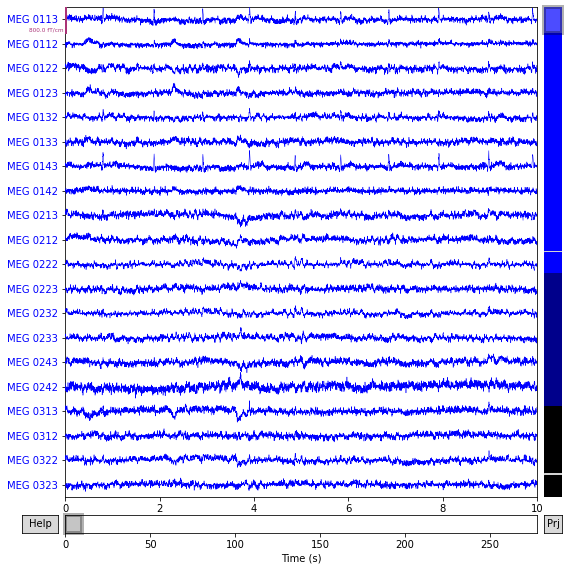

In [42]:
raw.plot();

## Extract events from the `STIM` channels

In this experiment, checkerboard patterns were presented to the subject into the left and right visual field, interspersed by tones to the left or right ear. The interval between the stimuli was 750 ms. Occasionally a smiley face was presented at the center of the visual field. The subject was asked to press a key with the right index finger as soon as possible after the appearance of the face.

We can extract information about the events in this task from the raw data.

In [43]:
events = mne.find_events(raw)

320 events found
Event IDs: [ 1  2  3  4  5 32]


Six events have been identified, we can label them according to the task paradigm.

In [44]:
event_id = {
    'Auditory/Left': 1,
    'Auditory/Right': 2,
    'Visual/Left': 3,
    'Visual/Right': 4,
    'Smiley': 5,
    'Button': 32
}
event_id

{'Auditory/Left': 1,
 'Auditory/Right': 2,
 'Visual/Left': 3,
 'Visual/Right': 4,
 'Smiley': 5,
 'Button': 32}

We can plot when these events take place in time in the task paradigm

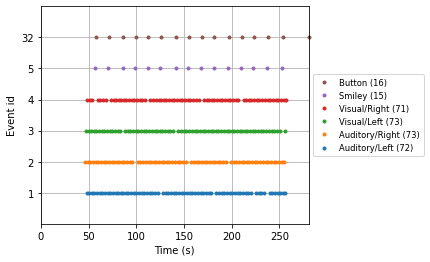

In [45]:
#rename events to plot
from mne.viz import plot_events
mne.viz.plot_events(events, event_id=event_id, sfreq=raw.info['sfreq']);

## Plot the raw data again, but add event markers

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


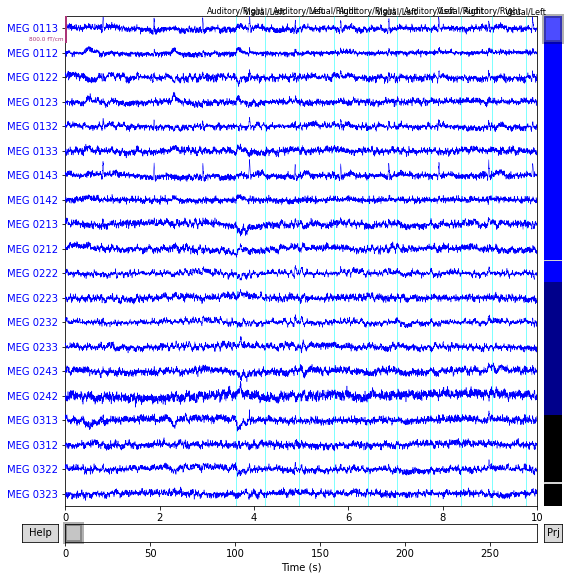

In [46]:
raw.plot(events=events, event_id=event_id);

## Gather some info about the data

In [47]:
raw.info

<Info | 21 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 description: acquisition (megacq) VectorView system at NMR-MGH
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 172.2 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 proj_id: 1 item (ndarray)
 proj_name: test
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off
 sfreq: 600.6 Hz
>

In [48]:
raw.info['meas_date']

datetime.datetime(2002, 12, 3, 19, 1, 10, 720100, tzinfo=datetime.timezone.utc)

In [49]:
raw.info['sfreq']

600.614990234375

In [50]:
#Identify bad channels labbeled during acquisition
raw.info['bads']

['MEG 2443', 'EEG 053']

In [51]:
#We can also call specific channels and their properties
raw.info['chs'][0]

{'scanno': 1,
 'logno': 113,
 'kind': 1 (FIFFV_MEG_CH),
 'range': 0.00030517578125,
 'cal': 3.1600000394149674e-09,
 'coil_type': 3012 (FIFFV_COIL_VV_PLANAR_T1),
 'loc': array([-0.1066    ,  0.0464    , -0.0604    , -0.0127    ,  0.0057    ,
        -0.99990302, -0.186801  , -0.98240298, -0.0033    , -0.98232698,
         0.18674099,  0.013541  ]),
 'unit': 201 (FIFF_UNIT_T_M),
 'unit_mul': 0 (FIFF_UNITM_NONE),
 'ch_name': 'MEG 0113',
 'coord_frame': 1 (FIFFV_COORD_DEVICE)}

## Select only a subset of the channels

In [52]:
raw_eeg = raw.copy()
raw_eeg.pick_types(meg=False, eeg=True, eog=True, exclude=[])
len(raw_eeg.ch_names)

Removing projector <Projection | PCA-v1, active : False, n_channels : 102>
Removing projector <Projection | PCA-v2, active : False, n_channels : 102>
Removing projector <Projection | PCA-v3, active : False, n_channels : 102>


61

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


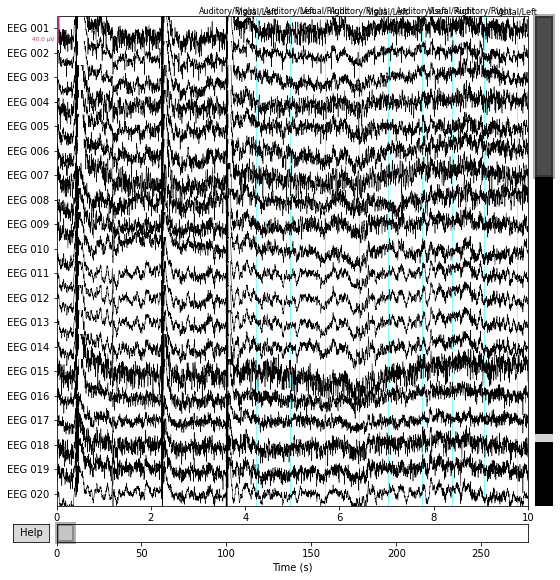

In [53]:
raw_eeg.plot(events=events, event_id=event_id);

## Visualize the sensor locations

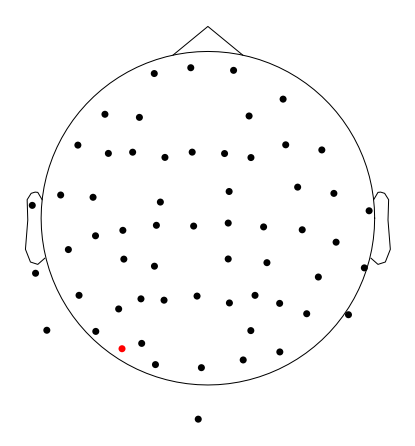

In [54]:
#In 2D
raw.plot_sensors(ch_type='eeg');

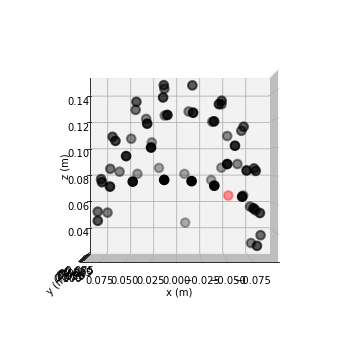

In [55]:
#In 3D
raw.plot_sensors(kind='3d', ch_type='eeg');

## Mark channels as bad

Mark an additional EEG channel as bad and view the topoplot.

In [56]:
raw.info['bads']

['MEG 2443', 'EEG 053']

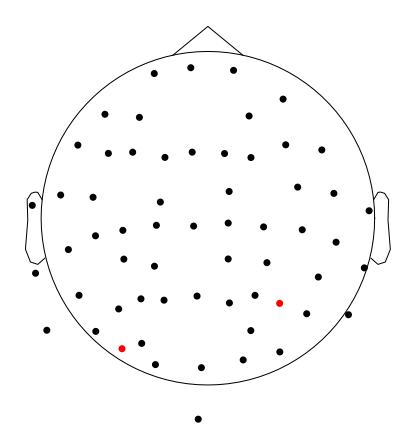

In [57]:
raw.info['bads'] += ['EEG 051']
raw.plot_sensors(ch_type='eeg');

# Cropping and filtering the data

##Cropping

This EEG datset contains around 278 seconds of data. We can use only the first 100 seconds for analysis by cropping the data.

In [58]:
raw.times[-1]

277.7136813300495

It's best to make a copy of the loaded data first before cropping.

In [59]:
raw_cropped = raw.crop(tmax=100)
raw_cropped.times[-1]

99.99916914588277

### Visualize and compare

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


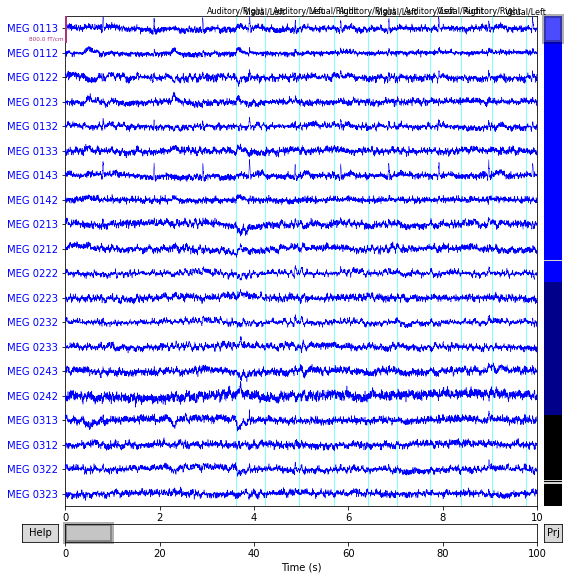

In [60]:
#Original time series
raw.plot(events=events, event_id=event_id);

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


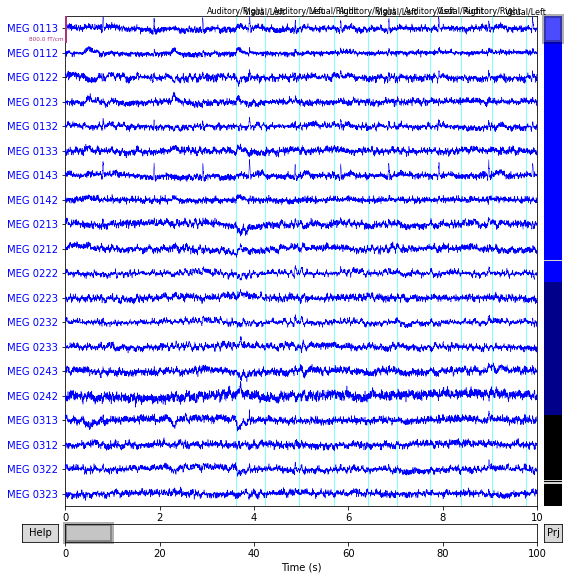

In [61]:
#Cropped time series
raw_cropped.plot(events=events, event_id=event_id);

##Filtering

We can also filter to get a specific frequency range

When we plot the power spectrum we can see frequencies ranging upto 300 Hz. 

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 0.426 (s)


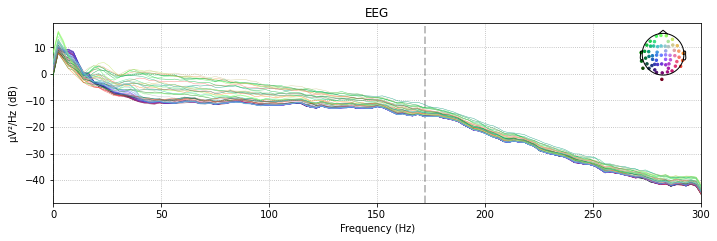

In [62]:
raw_cropped.plot_psd(picks=['eeg'])

Let's say we only want to look at signals between 0.1 and 40 Hz to focus only on some of the brain-related activity.

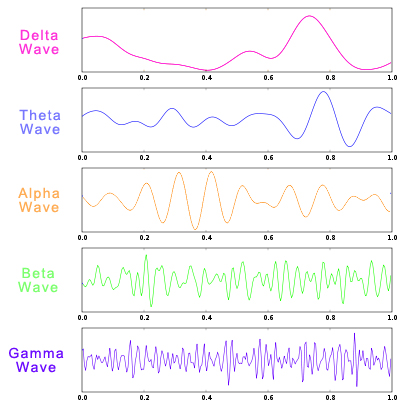

In [63]:
#Crop using a band pass filter from 1-40 Hz
raw_cropped_filtered = raw_cropped.filter(l_freq=1, h_freq=40)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1983 samples (3.302 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 366 out of 366 | elapsed:    0.6s finished


### Compare before and after

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 0.426 (s)
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 0.426 (s)


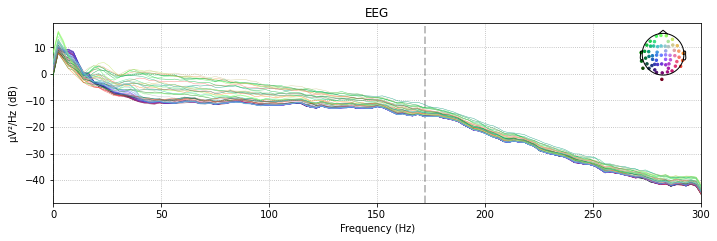

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


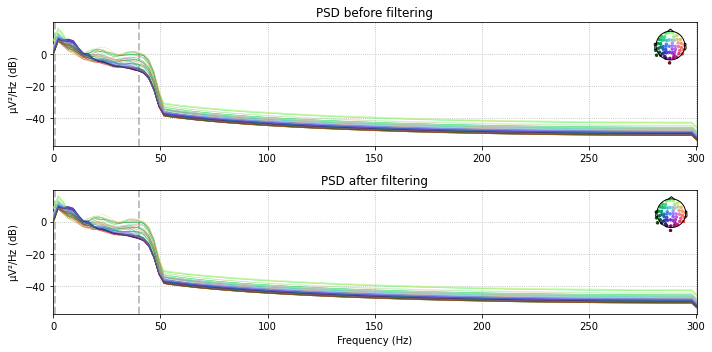

In [64]:
fig, ax = plt.subplots(2, figsize=(10,5))
raw_cropped.plot_psd(ax=ax[0],picks=['eeg'], show = False)
raw_cropped_filtered.plot_psd(ax=ax[1],picks=['eeg'], show = False)

ax[0].set_title('PSD before filtering')
ax[1].set_title('PSD after filtering')
ax[1].set_xlabel('Frequency (Hz)')
fig.set_tight_layout(True)
plt.show()

### Zoom in

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 0.426 (s)


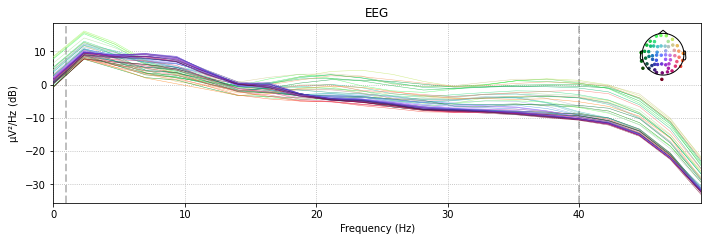

In [65]:
raw_cropped_filtered.plot_psd(picks=['eeg'], fmax=50)

# Saving the data in BIDS format


Neuroimaging experiments result in complicated data that can be arranged in many different ways. So far there is no consensus how to organize and share data obtained in neuroimaging experiments. Even two researchers working in the same lab can opt to arrange their data in a different way. Lack of consensus (or a standard) leads to misunderstandings and time wasted on rearranging data or rewriting scripts expecting certain structure.


### **What is this BIDS thing, anyway?**


BIDS, the Brain Imaging Data Structure, is a standard that describes how to organize neuroimaging and electrophysiological data. In particular, it defines:



*   which file formats to use
*   how to name your files
* where to place your files within a directory structure
* what additional metadata to store

The complete set of rules is written down in the [BIDS specification](https://bids-specification.readthedocs.io/en/stable/).

Here we use an extension to BIDS for electroencephalography (EEG) data, **EEG-BIDS**.

**[MNE-BIDS](https://mne.tools/mne-bids/stable/index.html)** is a Python package that allows you to read and write BIDS-compatible datasets with the help of MNE-Python.

##Write the raw data to BIDS!

We need to specify the power line frequency.

In [66]:
raw.info

<Info | 21 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: 3 items (MEG 2443, EEG 053, EEG 051)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 description: acquisition (megacq) VectorView system at NMR-MGH
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 1.0 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 proj_id: 1 item (ndarray)
 proj_name: test
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off
 sfreq: 600.6 Hz
>

In [67]:
#First, we need to specify the power line frequency as that is not included in the raw info

raw_cropped_filtered.info['line_freq'] = 60

#Set the path to where it will be saved
out_path = pathlib.Path('out_data/sample_BIDS')

#Set path with data specific variables for naming directory files
bids_path = mne_bids.BIDSPath(subject='01',
                              session='01',
                              task='audiovisual',
                              run='01',
                              root=out_path)
#Write raw to BIDS!
mne_bids.write_raw_bids(raw_cropped_filtered, bids_path=bids_path, events_data=events,
                        event_id=event_id, overwrite=True,format= 'FIF',allow_preload=True )

Writing 'out_data/sample_BIDS/README'...
Writing 'out_data/sample_BIDS/participants.tsv'...
Writing 'out_data/sample_BIDS/participants.json'...
Writing 'out_data/sample_BIDS/sub-01/ses-01/meg/sub-01_ses-01_coordsystem.json'...
Writing 'out_data/sample_BIDS/sub-01/ses-01/meg/sub-01_ses-01_coordsystem.json'...
Used Annotations descriptions: ['Auditory/Left', 'Auditory/Right', 'Button', 'Smiley', 'Visual/Left', 'Visual/Right']
Writing 'out_data/sample_BIDS/sub-01/ses-01/meg/sub-01_ses-01_task-audiovisual_run-01_events.tsv'...
Writing 'out_data/sample_BIDS/dataset_description.json'...
Writing 'out_data/sample_BIDS/sub-01/ses-01/meg/sub-01_ses-01_task-audiovisual_run-01_meg.json'...
Writing 'out_data/sample_BIDS/sub-01/ses-01/meg/sub-01_ses-01_task-audiovisual_run-01_channels.tsv'...
Copying data files to sub-01_ses-01_task-audiovisual_run-01_meg.fif
Reserving possible split file sub-01_ses-01_task-audiovisual_run-01_split-01_meg.fif


<ipython-input-67-3b8bb085620a>:16: FutureWarning: The events_data parameter has been deprecated in favor the new events parameter, to ensure better consistency  with MNE-Python. The events_data parameter will be removed in MNE-BIDS 0.14. Please use the events parameter instead.
  event_id=event_id, overwrite=True,format= 'FIF',allow_preload=True )
<ipython-input-67-3b8bb085620a>:16: RuntimeWarning: Omitted 173 annotation(s) that were outside data range.
  event_id=event_id, overwrite=True,format= 'FIF',allow_preload=True )


Writing /content/out_data/sample_BIDS/sub-01/ses-01/meg/sub-01_ses-01_task-audiovisual_run-01_meg.fif
Closing /content/out_data/sample_BIDS/sub-01/ses-01/meg/sub-01_ses-01_task-audiovisual_run-01_meg.fif
[done]
Writing 'out_data/sample_BIDS/sub-01/ses-01/sub-01_ses-01_scans.tsv'...
Wrote out_data/sample_BIDS/sub-01/ses-01/sub-01_ses-01_scans.tsv entry with meg/sub-01_ses-01_task-audiovisual_run-01_meg.fif.


BIDSPath(
root: out_data/sample_BIDS
datatype: meg
basename: sub-01_ses-01_task-audiovisual_run-01_meg.fif)

### Print the created file & directory structure

In [68]:
mne_bids.print_dir_tree(out_path)

|sample_BIDS/
|--- README
|--- dataset_description.json
|--- participants.json
|--- participants.tsv
|--- sub-01/
|------ ses-01/
|--------- sub-01_ses-01_scans.tsv
|--------- eeg/
|------------ sub-01_ses-01_space-CapTrak_coordsystem.json
|------------ sub-01_ses-01_space-CapTrak_electrodes.tsv
|------------ sub-01_ses-01_task-audiovisual_run-01_channels.tsv
|------------ sub-01_ses-01_task-audiovisual_run-01_eeg.json
|------------ sub-01_ses-01_task-audiovisual_run-01_events.tsv
|--------- meg/
|------------ sub-01_ses-01_coordsystem.json
|------------ sub-01_ses-01_task-audiovisual_run-01_channels.tsv
|------------ sub-01_ses-01_task-audiovisual_run-01_events.tsv
|------------ sub-01_ses-01_task-audiovisual_run-01_meg.fif
|------------ sub-01_ses-01_task-audiovisual_run-01_meg.json


###Generate a data summary

In [69]:
print(mne_bids.make_report(out_path))

Summarizing participants.tsv out_data/sample_BIDS/participants.tsv...
Summarizing scans.tsv files [PosixPath('out_data/sample_BIDS/sub-01/ses-01/sub-01_ses-01_scans.tsv')]...
The participant template found: sex were all unknown;
handedness were all unknown;
ages all unknown
This dataset was created by [Unspecified] and conforms to BIDS version 1.7.0.
This report was generated with MNE-BIDS (https://doi.org/10.21105/joss.01896).
The dataset consists of 1 participants (sex were all unknown; handedness were
all unknown; ages all unknown) and 1 recording sessions: 01. Data was recorded
using an MEG, and EEG system (Elekta) sampled at 600.61 Hz with line noise at
60.0 Hz. The following software filters were applied during recording:
SpatialCompensation. There was 1 scan in total. Recording durations ranged from
100.0 to 100.0 seconds (mean = 100.0, std = 0.0), for a total of 100.0 seconds
of data recorded over all scans. For each dataset, there were on average 376.0
(std = 0.0) recording ch

##Reading BIDS data

Opening raw data file out_data/sample_BIDS/sub-01/ses-01/meg/sub-01_ses-01_task-audiovisual_run-01_meg.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 85861 =     42.956 ...   142.955 secs
Ready.
Reading events from out_data/sample_BIDS/sub-01/ses-01/meg/sub-01_ses-01_task-audiovisual_run-01_events.tsv.
Reading channel info from out_data/sample_BIDS/sub-01/ses-01/meg/sub-01_ses-01_task-audiovisual_run-01_channels.tsv.


<ipython-input-70-335d28d93c91>:10: RuntimeWarning: The unit for channel(s) STI 001, STI 002, STI 003, STI 004, STI 005, STI 006, STI 014, STI 015, STI 016 has changed from V to NA.
  raw_BIDS = mne_bids.read_raw_bids(bids_path)


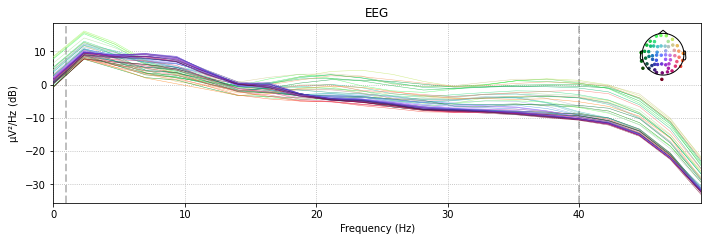

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


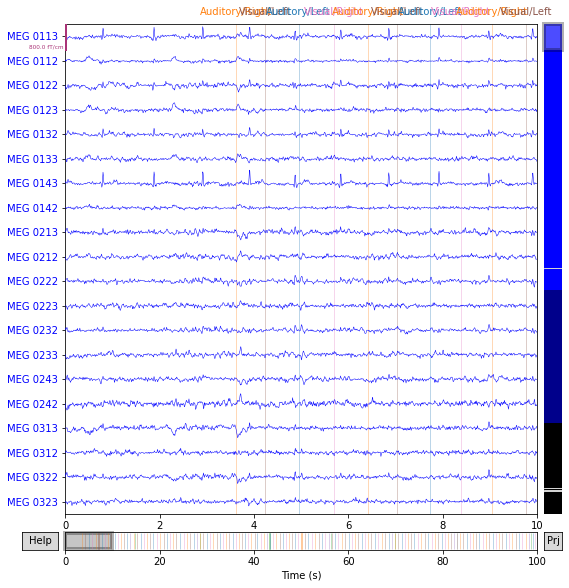

In [70]:
bids_root = pathlib.Path('out_data/sample_BIDS')

bids_path = mne_bids.BIDSPath(subject='01',
                              session='01',
                              task='audiovisual',
                              run='01',
                              datatype='meg',
                              root=bids_root)

raw_BIDS = mne_bids.read_raw_bids(bids_path)
raw_BIDS.plot();

#Refrences

**MNE-Python** - 
Alexandre Gramfort, Martin Luessi, Eric Larson, Denis A. Engemann, Daniel Strohmeier, Christian Brodbeck, Roman Goj, Mainak Jas, Teon Brooks, Lauri Parkkonen, and Matti S. Hämäläinen. MEG and EEG data analysis with MNE-Python. Frontiers in Neuroscience, 7(267):1–13, 2013. doi:10.3389/fnins.2013.00267.

**BIDS**
Gorgolewski, K.J., Auer, T., Calhoun, V.D., Craddock, R.C., Das, S., Duff, E.P., Flandin, G., Ghosh, S.S., Glatard, T., Halchenko, Y.O., Handwerker, D.A., Hanke, M., Keator, D., Li, X., Michael, Z., Maumet, C., Nichols, B.N., Nichols, T.E., Pellman, J., Poline, J.-B., Rokem, A., Schaefer, G., Sochat, V., Triplett, W., Turner, J.A., Varoquaux, G., Poldrack, R.A. (2016). The brain imaging data structure, a format for organizing and describing outputs of neuroimaging experiments. Scientific Data, 3 (160044). doi:10.1038/sdata.2016.44

**MNE-BIDS** - 
Appelhoff, S., Sanderson, M., Brooks, T., Vliet, M., Quentin, R., Holdgraf, C., Chaumon, M., Mikulan, E., Tavabi, K., Höchenberger, R., Welke, D., Brunner, C., Rockhill, A., Larson, E., Gramfort, A., & Jas, M. (2019). MNE-BIDS: Organizing electrophysiological data into the BIDS format and facilitating their analysis. *Journal of Open Source Software*, 4:1896. DOI: 10.21105/joss.01896

**EEG-BIDS** - Pernet, C. R., Appelhoff, S., Gorgolewski, K.J., Flandin, G., Phillips, C., Delorme, A., Oostenveld, R. (2019). EEG-BIDS, an extension to the brain imaging data structure for electroencephalography. Scientific data, 6 (103). doi:10.1038/s41597-019-0104-8

**MNE EEG-BIDS**
Niso, G., Gorgolewski, K., Bock, E. et al. MEG-BIDS, the brain imaging data structure extended to magnetoencephalography. *Sci Data* 5, 180110 (2018). https://doi.org/10.1038/sdata.2018.110

